In [148]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

In [165]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
        
    gamma: float
      Tuning parameter of the RBF kernel
        
    n_components: int
      Number of principal components to return

    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
       Projected dataset   

    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)

    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, i]
                            for i in range(n_components)))

    return X_pc

In [150]:
from sklearn.datasets import make_moons

In [151]:
X, y = make_moons(n_samples=100, random_state=123)


In [152]:
import matplotlib.pyplot as plt

In [153]:
X[:4]

array([[ 0.8713187 ,  0.49071755],
       [ 0.71547241, -0.45866785],
       [ 1.46253829, -0.38659931],
       [-0.22252093,  0.97492791]])

In [154]:
print(X[0:4])
print(y[0:4])

[[ 0.8713187   0.49071755]
 [ 0.71547241 -0.45866785]
 [ 1.46253829 -0.38659931]
 [-0.22252093  0.97492791]]
[0 1 1 0]


In [155]:
a = X[y==0, 0]
print(a.shape)
b = X[y==0, 1]
print(b.shape)

a1 = X[y==1, 0]
b2 = X[y==1, 1]
print(a1.shape)
print(b2.shape)

(50,)
(50,)
(50,)
(50,)


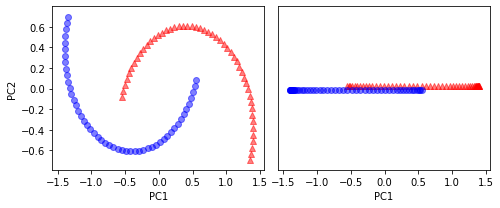

In [166]:


from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_13.png', dpi=300)
plt.show()



It is clearly not L:inearly separabel, our goal to to use Kernel PCA

but first lets use PCA and see how it transforms

In [167]:
from sklearn.decomposition import PCA

In [168]:
pca = PCA(n_components=2)

In [169]:
a = X_pca[y==0, 0]
print(a.shape)
b = X_pca[y==0, 1]
print(b.shape)

a1 = X_pca[y==1, 0]
b2 = X_pca[y==1, 1]
print(a1.shape)
print(b2.shape)

(50,)
(50,)
(50,)
(50,)


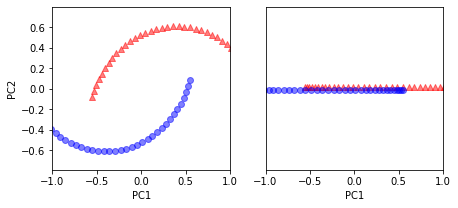

In [170]:
X_pca = pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(a,b, color ='red', marker ='^', alpha =0.5)
ax[0].scatter(a1,b2, color ='blue', marker ='o', alpha =0.5)


ax[1].scatter(a, np.zeros((50,1)) + 0.02, color ='red', marker ='^', alpha =0.5)
ax[1].scatter(a1, np.zeros((50,1)) - 0.02, color ='blue', marker ='o', alpha =0.5)


ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_xlim([-1,1])

ax[1].set_ylim([-1, 1])

ax[1].set_xlim([-1,1])

ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

Clearly it is not Linearly Speprarble

### lets try with kernel PCA

<ipython-input-165-a20c3124a5f1>:34: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma * mat_sq_dists)
<ipython-input-165-a20c3124a5f1>:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X_pc = np.column_stack((eigvecs[:, i]


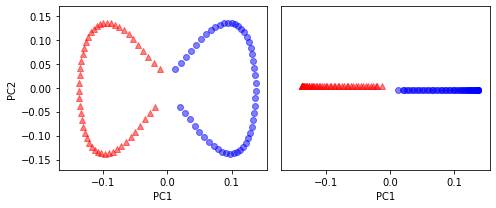

In [174]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, 
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_14.png', dpi=300)
plt.show()